[[[ 249.   52.]]

 [[ 129.  142.]]

 [[ 177.   67.]]

 [[ 268.    1.]]

 [[ 149.   12.]]

 [[ 184.   11.]]

 [[ 223.   39.]]

 [[ 237.   14.]]]


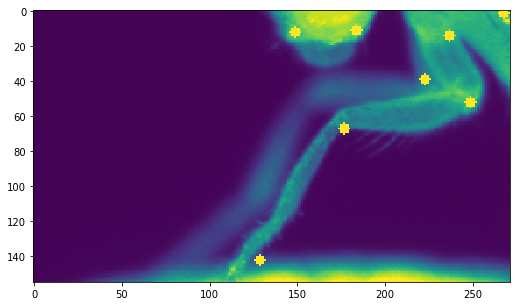

(<matplotlib.image.AxesImage at 0x82216d8>, None)

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

cap = cv2.VideoCapture('fly6.avi')
cap.set(1,0)
ret, frame = cap.read()


gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = gray[25:200,160:500]
# gray = gray[100:260,50:270]
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)
gray2 = np.copy(gray)

feature_params = dict( maxCorners = 200,
                       qualityLevel = 0.2,
                       minDistance = 25,
                       blockSize = 20,
                       useHarrisDetector=False)

corners = cv2.goodFeaturesToTrack(gray,mask = None, **feature_params)
print(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(gray,(x,y),3,255,-1)

plt.imshow(gray),plt.show()

# s = raw_input()
# numbers = map(int, s.split())
# a = np.array(numbers)
# corners = np.array([[a[0],a[1]],[a[2],a[3]],[a[4],a[5]]])

# for i in corners:
#     x,y = i.ravel()
#     cv2.circle(gray2,(x,y),3,255,-1)
    
# plt.imshow(gray2),plt.show()



In [1]:
### Other note:
### need to define region!!!
### Add expert Mode parameter 
### Flexible Tracking window size
#####################


# import all of the necessary libraries
import cv2
import math
import numpy as np

########## Define Variables #################
setNumber = 5
firstN = 6875
outframeRate = 100
inputName = 'fly5.mp4' 
initBlockSize = 16
errorT = 5

################ sub-function ##################
################ mouse_input  ##################
ix,iy = -1,-1
def mouse_input(event,x,y,flags,param):
    global ix,iy
    if event == cv2.EVENT_LBUTTONDOWN:
        ix,iy = x,y
        
################ sub-function       #############        
################ get closest point  #############
def distance(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
def closest(pt, others):
    return min(others, key = lambda i: distance(pt, i))

################### Main Function #####################
#### Input and Output Files Initialization   ####

# Initialize output files! #
ang_f_n = "angleSet" + str(setNumber) + ".txt" # store Angle data
joi_f_n = "jointSet" + str(setNumber) + ".txt" # Store joint position
fa = open(ang_f_n, "w");
fa.close()
fb = open(joi_f_n, "w");
fb.close()

# Initialize input video stream handler and set first frame #
cap = cv2.VideoCapture(inputName)
cap.set(1,firstN)

# Read the first frame #
ret, firstFrame = cap.read()
firstFrame = firstFrame[25:200,160:500]
firstGray = cv2.cvtColor(firstFrame, cv2.COLOR_BGR2GRAY)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
video_name = "out_circle" + str(setNumber) + ".avi"
out = cv2.VideoWriter(video_name, fourcc, outframeRate, (np.size(firstFrame,1),np.size(firstFrame,0)))

#### Tracking Parameter Initialization  ####

# Define Feature Parameter: #
feature_params = dict( maxCorners = 200,
                       qualityLevel = 0.2,
                       minDistance = 25,
                       blockSize = initBlockSize,
                       useHarrisDetector=False)

# Define Tracking Parameter: #
lk_params = dict( winSize  = (17,17),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Define color for joints in debug interface: #
color = np.array([[ 0,  0, 255],
       [255, 0, 0],
       [0,  255, 0]])


#### First Frame Joint Tracking      ####

# Find the strong features: #
p0 = cv2.goodFeaturesToTrack(firstGray, mask = None, **feature_params)
old_gray_a = np.copy(firstGray)

for i in p0:
    x,y = i.ravel()
    cv2.circle(old_gray_a,(x,y),3,255,-1)

# Open Debug interface
cv2.namedWindow('Initialization')
cv2.setMouseCallback('Initialization',mouse_input)

while(1):
    pR = p0.reshape(p0.shape[0],2)
    cv2.imshow('Initialization', old_gray_a)
    k = cv2.waitKey(20) & 0xFF
    if k == ord('q'):
        break
    elif(k == ord('a')):
        x,y = ix,iy
        a1 = closest((x,y),pR)
    elif(k == ord('s')):
        x,y = ix,iy
        a2 = closest((x,y),pR)
    elif(k == ord('d')):
        x,y = ix,iy
        a3 = closest((x,y),pR)

# Build point verification Interface: #
cv2.namedWindow('verificationIn')

# Re-select Features if the two of them are same.
while(all(a1 == a2) or all(a2 == a3)):
    print("re-select initial features! Pick joints!")
    while(1):
        cv2.imshow('Initialization', old_gray_a)
        k = cv2.waitKey(10) & 0xFF
        if k == ord('q'):
            break
        elif(k == ord('a')):
            x,y = ix,iy
            a1 = x,y
            a1 = np.array(a1)
        elif(k == ord('s')):
            x,y = ix,iy
            a2 = x,y
            a2 = np.array(a2)
        elif(k == ord('d')):
            x,y = ix,iy
            a3 = x,y
            a3 = np.array(a3)
        ogc = np.copy(firstGray)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(ogc,'A',(a1[0],a1[1]), \
                    font, 1,255,2,cv2.LINE_AA)
        cv2.putText(ogc,'B',(a2[0],a2[1]), \
                    font, 1,255,2,cv2.LINE_AA)
        cv2.putText(ogc,'C',(a3[0],a3[1]), \
                    font, 1,255,2,cv2.LINE_AA)
        ogc = cv2.circle(ogc,(a1[0],a1[1]),3,255,-1)
        ogc = cv2.circle(ogc,(a2[0],a2[1]),3,255,-1)
        ogc = cv2.circle(ogc,(a3[0],a3[1]),3,255,-1)
        cv2.imshow('verificationIn',ogc)
                    
#### First Frame Joint Angle Calculation Part ####
p0 = np.array([[[a1[0],a1[1]]],[[a2[0],a2[1]]],[[a3[0],a3[1]]]],dtype=np.float32)

b1 = (a2[0] - a1[0])**2 + (a2[1] - a1[1])**2
b2 = (a2[0] - a3[0])**2 + (a2[1] - a3[1])**2
b3 = (a1[0] - a3[0])**2 + (a1[1] - a3[1])**2

bb1 = math.sqrt(b1)
bb2 = math.sqrt(b2)

angle = (np.arccos((b1 + b2 - b3) / (2 * bb1 * bb2))/ np.pi * 180)
print angle
myString = str(angle)

nf = firstN

f1 = open(ang_f_n, "a");
f1.write(myString + ' ' + str(nf) + '\n')
f1.close()

f2 = open(joi_f_n, "a");
f2.write(str(a1[0]) + ' ' + str(a1[1]) + ' ' + \
         str(a2[0]) + ' ' + str(a2[1]) + ' ' + \
         str(a3[0]) + ' ' + str(a3[1]) + ' ' + str(nf) + '\n')
f2.close()

old_frame = np.copy(firstFrame)
old_gray = firstGray.copy()
cv2.destroyWindow('Initialization')
cv2.destroyWindow('verificationIn')

mask = np.zeros_like(firstFrame)

blockS = initBlockSize

#### The Rest of Frames     ####
while(cap.isOpened()):
    ret,frame = cap.read()
    nf = nf + 1    
    if (ret == True):
        frame =  frame[25:200,160:500]
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        
        # Check whether reach the error threshold #
        eCheck = any(i > errorT for i in err) 
        
        # Checking for negative tracking value #
        allP = ((p1 >= 0).sum() == p1.size).astype(np.int)
        
        ##### Semi-Auto Modification part! ######
        cv2.namedWindow('verification')
        if(p1.shape[0] < 3 or eCheck or allP == 0):
            
            # Re-computer features based on the original parameter #
            p1 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
            pR = p1.reshape(p1.shape[0],2)
            frame_gray_a = np.copy(frame_gray)
            
            pR0 = p0.reshape(p0.shape[0],2)
            for i in p1:
                x,y = i.ravel()
                cv2.circle(frame_gray_a,(x,y),3,255,-1)
                
            # Auto - Select First #
            a1 = closest((pR0[0][0],pR0[0][1]),pR)
            a2 = closest((pR0[1][0],pR0[1][1]),pR)
            a3 = closest((pR0[2][0],pR0[2][1]),pR)

            #### Manual Modification ####
            
            cv2.namedWindow('select feature')
            cv2.setMouseCallback('select feature',mouse_input)
            while(1):
                cv2.imshow('select feature', frame_gray_a)
                k = cv2.waitKey(10) & 0xFF
                if k == ord('q'):
                    break
                elif(k == ord('a')):
                    x,y = ix,iy
                    a1 = closest((x,y),pR)
                elif(k == ord('s')):
                    x,y = ix,iy
                    a2 = closest((x,y),pR)
                elif(k == ord('d')):
                    x,y = ix,iy
                    a3 = closest((x,y),pR)
                ogc = np.copy(frame_gray)
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(ogc,'A',(a1[0],a1[1]), \
                            font, 1,255,2,cv2.LINE_AA)
                cv2.putText(ogc,'B',(a2[0],a2[1]), \
                            font, 1,255,2,cv2.LINE_AA)
                cv2.putText(ogc,'C',(a3[0],a3[1]), \
                            font, 1,255,2,cv2.LINE_AA)
                ogc = cv2.circle(ogc,(a1[0],a1[1]),3,255,-1)
                ogc = cv2.circle(ogc,(a2[0],a2[1]),3,255,-1)
                ogc = cv2.circle(ogc,(a3[0],a3[1]),3,255,-1)
            
                cv2.imshow('verification',ogc)
            frame_gray_c = np.copy(frame_gray_a)
            frame_gray_b = np.copy(frame_gray_a)
            # Need to further change optical flow parameter, input 0
            while(all(a1 == a2) or all(a2 == a3) or all(a1 == a3)):
                ogc = np.copy(frame_gray)
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(ogc,'A',(a1[0],a1[1]), \
                            font, 1,255,2,cv2.LINE_AA)
                cv2.putText(ogc,'B',(a2[0],a2[1]), \
                            font, 1,255,2,cv2.LINE_AA)
                cv2.putText(ogc,'C',(a3[0],a3[1]), \
                            font, 1,255,2,cv2.LINE_AA)
                
                cv2.putText(ogc,'Press W to Manual Mode,',(2,12), \
                            font, 0.3,255,1,cv2.LINE_AA)
                cv2.putText(ogc,'Press X or D',(2,24), \
                            font, 0.3,255,1,cv2.LINE_AA)
                cv2.putText(ogc,' for changing parameter',(10,36), \
                            font, 0.3,255,1,cv2.LINE_AA)
                cv2.putText(ogc,'Press Z ',(2,48), \
                            font, 0.3,255,1,cv2.LINE_AA)
                cv2.putText(ogc,'to re-select feature point',(10,60), \
                            font, 0.3,255,1,cv2.LINE_AA)
                currentBlock = 'current Blocksize =' + str(blockS)
                cv2.putText(ogc,currentBlock,(2,72), \
                            font, 0.3,255,1,cv2.LINE_AA)
                ogc = cv2.circle(ogc,(a1[0],a1[1]),4,255,-1)
                ogc = cv2.circle(ogc,(a2[0],a2[1]),4,255,-1)
                ogc = cv2.circle(ogc,(a3[0],a3[1]),4,255,-1)
                cv2.imshow('verification',ogc)
                
                k = cv2.waitKey(10) & 0xFF
                if k == ord('w'):
                    while(1):
                        cv2.imshow('select feature', frame_gray_c)
                        k1 = cv2.waitKey(10) & 0xFF
                        if k1 == ord('q'):
                            break
                        elif(k1 == ord('a')):
                            x,y = ix,iy
                            a1 = x,y
                            a1 = np.array(a1)
                        elif(k1 == ord('s')):
                            x,y = ix,iy
                            a2 = x,y
                            a2 = np.array(a2)
                        elif(k1 == ord('d')):
                            x,y = ix,iy
                            a3 = x,y
                            a3 = np.array(a3)
                        ogc = np.copy(frame_gray)
                        font = cv2.FONT_HERSHEY_SIMPLEX
                        cv2.putText(ogc,'A',(a1[0],a1[1]), \
                                    font, 1,255,2,cv2.LINE_AA)
                        cv2.putText(ogc,'B',(a2[0],a2[1]), \
                                    font, 1,255,2,cv2.LINE_AA)
                        cv2.putText(ogc,'C',(a3[0],a3[1]), \
                                    font, 1,255,2,cv2.LINE_AA)
                        cv2.putText(ogc,'Mode M(Manual),',(2,12), \
                                        font, 0.3,255,1,cv2.LINE_AA)
                        cv2.putText(ogc,'Pick joint point!',(2,24), \
                                        font, 0.3,255,1,cv2.LINE_AA)
                        cv2.putText(ogc,'Press Q to esc',(2,36), \
                                        font, 0.3,255,1,cv2.LINE_AA)
                        
                        ogc = cv2.circle(ogc,(a1[0],a1[1]),3,255,-1)
                        ogc = cv2.circle(ogc,(a2[0],a2[1]),3,255,-1)
                        ogc = cv2.circle(ogc,(a3[0],a3[1]),3,255,-1)
                        cv2.imshow('verification',ogc)
                elif (k == ord('x') or k == ord('c')):
                    if(k == ord('x')):
                        blockS = blockS + 1
                        if blockS > 30:
                            blockS = 30
                    elif(k == ord('c')):
                        blockS = blockS - 1
                        if blockS < 10:
                            blockS = 10
                            
                    feature_params = dict( maxCorners = 200,
                                           qualityLevel = 0.1,
                                           minDistance = 35,
                                           blockSize = blockS,
                                           useHarrisDetector = False)
                    p1 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)           
                    pR = p1.reshape(p1.shape[0],2)
                    frame_gray_b = np.copy(frame_gray)
                    for i in p1:
                        x,y = i.ravel()
                        cv2.circle(frame_gray_b,(x,y),3,255,-1)
                    cv2.imshow('select feature', frame_gray_b)
                elif( k == ord('z')):
                    while(1):
                        cv2.imshow('select feature', frame_gray_b)
                        k2 = cv2.waitKey(10) & 0xFF
                        if k2 == ord('q'):
                            break
                        elif(k2 == ord('a')):
                            x,y = ix,iy
                            a1 = closest((x,y),pR)
                        elif(k2 == ord('s')):
                            x,y = ix,iy
                            a2 = closest((x,y),pR)
                        elif(k2 == ord('d')):
                            x,y = ix,iy
                            a3 = closest((x,y),pR)

                        ogc = np.copy(frame_gray)
                        font = cv2.FONT_HERSHEY_SIMPLEX
                        cv2.putText(ogc,'A',(a1[0],a1[1]), \
                                        font, 1,255,2,cv2.LINE_AA)
                        cv2.putText(ogc,'B',(a2[0],a2[1]), \
                                        font, 1,255,2,cv2.LINE_AA)
                        cv2.putText(ogc,'C',(a3[0],a3[1]), \
                                        font, 1,255,2,cv2.LINE_AA)
                        cv2.putText(ogc,'Mode Z,',(2,12), \
                                        font, 0.3,255,1,cv2.LINE_AA)
                        cv2.putText(ogc,'Select feature points,',(2,24), \
                                        font, 0.3,255,1,cv2.LINE_AA)
                        cv2.putText(ogc,'Press Q to Esc',(2,36), \
                                        font, 0.3,255,1,cv2.LINE_AA)
                                    
                        ogc = cv2.circle(ogc,(a1[0],a1[1]),3,255,-1)
                        ogc = cv2.circle(ogc,(a2[0],a2[1]),3,255,-1)
                        ogc = cv2.circle(ogc,(a3[0],a3[1]),3,255,-1)
                        cv2.imshow('verification',ogc)
                            
                    frame_gray_c = np.copy(frame_gray_b)
            p1 = np.array([[[a1[0],a1[1]]],[[a2[0],a2[1]]],[[a3[0],a3[1]]]],dtype=np.float32)
            cv2.destroyWindow('select feature')
               
        ################################################

        
        good_new = p1.reshape(3,2)
        
        m1 = good_new[0]
        m2 = good_new[1]             
        m3 = good_new[2]
        
        

        b1 = (m2[0] - m1[0])**2 + (m2[1] - m1[1])**2
        b2 = (m2[0] - m3[0])**2 + (m2[1] - m3[1])**2
        b3 = (m1[0] - m3[0])**2 + (m1[1] - m3[1])**2

        bb1 = math.sqrt(b1)
        bb2 = math.sqrt(b2)

        angle = (np.arccos((b1 + b2 - b3) / (2 * bb1 * bb2))/ np.pi * 180)
        print angle
        myString = str(angle)
 
        f1 = open(ang_f_n, "a");
        f1.write(myString + ' ' + str(nf) + '\n')
        f1.close()
        
        f2 = open(joi_f_n, "a");
        f2.write(str(m1[0]) + ' ' + str(m1[1]) + ' ' + \
                 str(m2[0]) + ' ' + str(m2[1]) + ' ' + \
                 str(m3[0]) + ' ' + str(m3[1]) + ' ' + str(nf) +'\n')
        f2.close()
        
        good_old = p0[st==1]
        for i,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
        img = cv2.add(frame,mask)

        cv2.imshow('frame',img)
        out.write(frame)
        k = cv2.waitKey(10) & 0xff
        if k == 27:
            break

        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
    else:
        break

cv2.destroyAllWindows()
out.release()

re-select initial features! Pick joints!
75.11618474
74.809847056
73.9823600037
73.3761330989
72.7900145597
72.0065499042
70.627042727
69.5749759074
68.6802206058
73.7815857731
73.5802652923
73.7455232565
74.1775775312
74.9110507592
76.4550889527
78.1901180672
79.8988452954
81.8857647626
84.3652199218
86.9248015857
94.4883731225
97.5691495047
92.6195487954
96.5180697881
99.1585563844
101.033255084
102.318156876
103.085900293
105.962032745
107.037672451
108.381654412
109.591891349
111.008405649
112.194872379
113.468427875
114.442930791
115.391268689
116.363642002
117.158711809
118.703802982
125.007276697
124.913697808
124.746019664
124.544946519
124.205758301
123.703421348
122.750333349
121.961440728
121.284263788
120.729510325
120.174910929
119.604068136
119.041692376
118.148566938
117.046708277
116.085950264
115.074121871
114.115282653
112.723368493
115.505054646
113.929397986
122.300950194
108.701304969


KeyboardInterrupt: 

In [2]:
out.release()

False